In [1]:
import numpy as np
import vibration_toolbox as vtb
%matplotlib notebook

In [5]:
x1, x2 = (1,1)
k = 0.05
alpha1 = 1
nu, beta = 1e-3, 1e-3

In [6]:
M = np.array([[x1,0],
             [0,x2]])
K = np.array([[1+k,-k],
             [-k,1+alpha1+k]])
C = nu*M + beta*K

In [7]:
sys = vtb.VibeSystem(M, C, K, name='1 dof system')

In [8]:
sys.wn

array([1.02347751, 1.43265271])

In [9]:
sys.wd

array([1.023477  , 1.43265189])

<IPython.core.display.Javascript object>


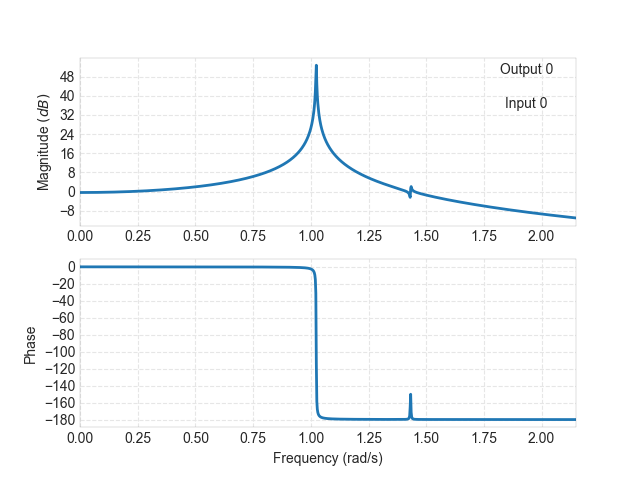

In [10]:
ax = sys.plot_freq_response(0,0)

In [11]:
sys.C = 20*C
sys.wd

array([1.02327269, 1.43232748])

<IPython.core.display.Javascript object>


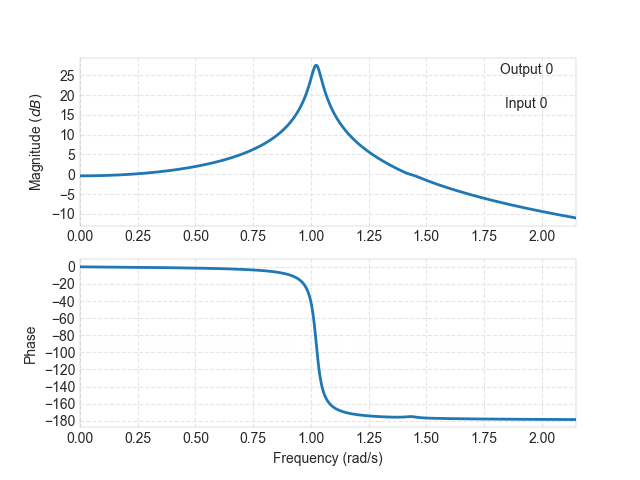

In [12]:
ax = sys.plot_freq_response(0,0)

<IPython.core.display.Javascript object>


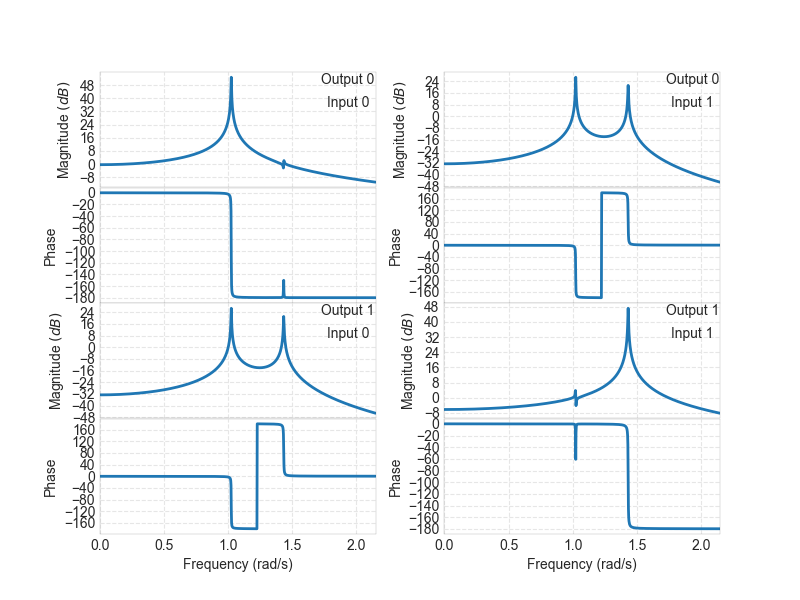

In [13]:
sys.C = C
axs = sys.plot_freq_response_grid([0,1],[0,1])

<IPython.core.display.Javascript object>


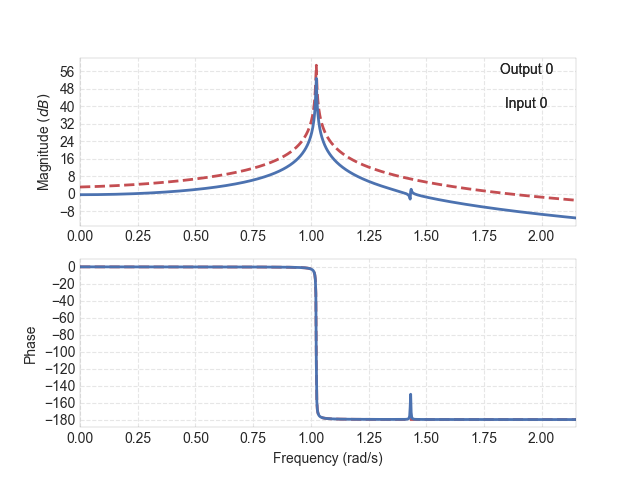

In [15]:
ax = sys.plot_freq_response(0,0, modes=[0.1, 0.005], color = 'r', linestyle = '--',
                          label ='Modes .1 and .005')
ax = sys.plot_freq_response(0,0, ax0=ax[0],ax1=ax[1],color='b',label='All modes')
